# ETF Project

## Part 1- PCA

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats.stats as sss
from scipy import stats
%matplotlib inline

In [3]:
df = pd.read_csv("etf1116.csv", index_col='Date')
df.head()

,AAXJ,ACWI,ACWX,BND,DVY,EMB,EUFN,IBB,IEF,IEI,...,VCSH,VGIT,VGSH,VMBS,VNQI,VONE,VONG,VONV,VTWO,VXUS
Date,,,,,,,,,,,,,,,,,,,,,
2011/9/30,45.372423,35.202441,30.744580,69.895351,38.825523,78.482147,12.264009,31.426055,91.342396,111.105763,...,66.883102,57.473746,57.790888,45.210309,32.866572,47.203062,50.939263,43.763462,49.286762,34.249464
2011/10/31,44.623516,35.980708,31.365618,69.632178,40.058066,77.955642,13.088692,31.577730,90.219666,110.439951,...,66.573039,57.008879,57.695266,44.981439,32.566956,48.494054,52.131335,45.093775,50.549154,34.686243
2011/11/30,45.569679,36.100034,31.121327,70.205719,40.867194,79.693801,12.239144,31.569435,91.441532,111.330221,...,66.909238,57.561930,57.755891,45.144188,32.225245,49.473142,53.215923,45.915957,52.326662,34.356453
2011/12/31,44.479050,36.230516,30.936410,70.376153,42.019801,79.988997,12.069940,33.468053,91.985672,111.612574,...,66.884123,57.775643,57.772545,45.401674,31.416120,50.175823,53.595432,46.984296,53.300752,33.906198
2012/1/31,46.998776,37.765753,32.104759,70.742376,43.208863,80.155702,12.650736,36.773831,92.428376,111.986713,...,67.563237,58.020396,57.800046,45.657482,32.974324,52.607558,55.978723,49.441150,56.250786,35.423762


In [5]:
df2 = pd.DataFrame(index=df.columns)
df2['Close'] = df.iloc[-1, :]
df2['PE'] = 0
df2['PB'] = 0
df2['ROE'] = 0 
df2.head()

,Close,PE,PB,ROE
AAXJ,69.709183,0,0,0
ACWI,66.146614,0,0,0
ACWX,46.217087,0,0,0
BND,79.226578,0,0,0
DVY,89.149200,0,0,0


In [3]:
from statsmodels.multivariate.pca import PCA 
df_pca=df.drop(['Mkt-RF','SMB','HML'],axis=1)
pc=PCA(df_pca)
pc.eigenvals/np.sum(pc.eigenvals)

0     8.347913e-01
1     1.045418e-01
2     2.081067e-02
3     1.889318e-02
4     1.094345e-02
5     3.025736e-03
6     2.118590e-03
7     1.494907e-03
8     8.926921e-04
9     8.471682e-04
10    4.005614e-04
11    3.314589e-04
12    1.870175e-04
13    1.815782e-04
14    1.407295e-04
15    1.143547e-04
16    9.582632e-05
17    4.833296e-05
18    4.422472e-05
19    2.617596e-05
20    1.646042e-05
21    1.471081e-05
22    9.828279e-06
23    8.311754e-06
24    5.180007e-06
25    4.205999e-06
26    3.467998e-06
27    2.778651e-06
28    1.810412e-06
29    1.423740e-06
30    1.120019e-06
31    6.099536e-07
32    2.550549e-07
33    1.041224e-07
34    1.862864e-08
Name: eigenvals, dtype: float64

0.9790369115161323


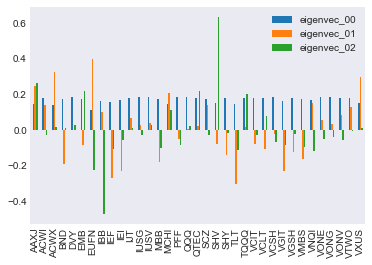

In [23]:
print(np.sum(pc.eigenvals[0:4])/np.sum(pc.eigenvals))
eigenvecs=pc.eigenvecs
eigenvecs.set_index(df_pca.columns,inplace=True)
pc.eigenvecs[['eigenvec_00','eigenvec_01','eigenvec_02']].plot(kind='bar')

Vector 0 is the market, vector 1 is small minus big (size), and -vector 2 is high minus low (value-growth) 

In [5]:
eigenvecs3=eigenvecs.iloc[:,0:3]
eigenvecs3

,eigenvec_00,eigenvec_01,eigenvec_02
AAXJ,0.143581,0.245146,0.265085
ACWI,0.177654,0.141573,-0.031469
ACWX,0.140941,0.326587,0.017696
BND,0.170034,-0.190448,0.012119
DVY,0.182493,0.000833,0.028718
EMB,0.171312,-0.086193,0.216565
EUFN,0.109373,0.398639,-0.224996
IBB,0.159924,0.098753,-0.475881
IEF,0.154690,-0.270463,-0.110638
IEI,0.164511,-0.230630,-0.055376


In [6]:
PCFactors=df_pca @ eigenvecs3.values
PCFactors.columns=['Level','Size','Bm']
PCFactors.tail()

,Level,Size,Bm
Date,,,
2017/4/30,463.580239,-62.790037,6.003912
2017/5/31,470.544609,-59.039818,7.625974
2017/6/30,478.015930,-58.247309,6.578883
2017/7/31,481.384830,-54.135102,4.950959
2017/8/31,485.531571,-52.572213,5.747013


In [7]:
PCFactors.mean()

Level    390.937188
Size     -75.531382
Bm         7.496269
dtype: float64

In [10]:
PCFactors.mean()/PCFactors.std()*np.sqrt(12)

Level    27.853655
Size    -19.281181
Bm        2.187230
dtype: float64

In [8]:
pd.concat([PCFactors,df[['Mkt-RF','SMB','HML']]],axis=1).corr()

,Level,Size,Bm,Mkt-RF,SMB,HML
Level,1.000000,0.712737,-0.777248,-0.068161,-0.017729,-0.125833
Size,0.712737,1.000000,-0.618947,-0.016552,-0.066061,-0.225100
Bm,-0.777248,-0.618947,1.000000,0.180126,0.018949,0.116543
Mkt-RF,-0.068161,-0.016552,0.180126,1.000000,0.343142,0.049021
SMB,-0.017729,-0.066061,0.018949,0.343142,1.000000,0.127491
HML,-0.125833,-0.225100,0.116543,0.049021,0.127491,1.000000


In [9]:
np.sqrt(12)*pd.concat([PCFactors,df[['Mkt-RF','SMB','HML']]],axis=1).mean()/pd.concat([PCFactors,df[['Mkt-RF','SMB','HML']]],axis=1).std()

Level     27.853655
Size     -19.281181
Bm         2.187230
Mkt-RF     1.274177
SMB       -0.103333
HML        0.053932
dtype: float64

## Part 2- Regress

In [11]:
import statsmodels.api as sm
FF3=pd.DataFrame([],index=df.drop(['Mkt-RF','HML','SMB'],axis=1).columns,\
                 columns=['avg','alpha','talpha','betamkt','tbetamkt','betahml','tbetahml','betasmb','tbetasmb']) 

FF3Resid = df.drop(['Mkt-RF','HML','SMB'],axis=1).copy()

FF3['avg'] = df.drop(['Mkt-RF','HML','SMB'],axis=1).mean()

for portfolio in FF3.index:
    y = df[portfolio]
    x = df[['Mkt-RF','HML','SMB']]
    x = sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    FF3.at[portfolio,['alpha','betamkt','betahml','betasmb']]=results.params.values
    FF3.at[portfolio,['talpha','tbetamkt','tbetahml','tbetasmb']]=(results.params/results.HC0_se).values
    FF3Resid[portfolio]=results.resid
    
FF3=FF3.astype('float')  
FF3

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml,betasmb,tbetasmb
AAXJ,54.200221,54.104248,76.936480,0.086393,0.395678,-0.465792,-1.889962,-0.115821,-0.411591
ACWI,50.448130,50.567369,50.112672,-0.083050,-0.246808,-0.558063,-1.378223,-0.001326,-0.003525
ACWX,38.149943,38.093446,77.659265,0.049351,0.302917,-0.303982,-1.967827,-0.111447,-0.582400
BND,74.233850,74.321570,215.971968,-0.069816,-0.659114,-0.002860,-0.018614,0.050940,0.362831
DVY,63.827335,64.112699,35.957545,-0.202025,-0.355686,-0.735312,-0.876792,0.249450,0.367148
EMB,93.098796,93.149860,95.186933,-0.041448,-0.130400,-0.027140,-0.062570,0.001516,0.003905
EUFN,17.572586,17.560415,44.953312,0.010437,0.081087,-0.228070,-1.871224,-0.112310,-0.719798
IBB,78.356414,80.092604,21.801253,-1.354701,-1.050447,-1.913003,-1.432297,0.540045,0.367644
IEF,97.905902,98.099666,159.724618,-0.155050,-0.818306,0.058041,0.216014,0.130669,0.509653
IEI,115.870997,115.986572,269.708318,-0.092041,-0.697509,0.010334,0.053072,0.073444,0.407198


In [12]:
sort_df = FF3.sort_values(by='alpha', ascending=False)
sort_df.head(6)

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml,betasmb,tbetasmb
IEI,115.870997,115.986572,269.708318,-0.092041,-0.697509,0.010334,0.053072,0.073444,0.407198
IJT,109.668158,110.239701,34.058551,-0.418647,-0.399572,-1.475943,-0.986643,0.239731,0.194489
TLT,108.220546,108.714183,78.458862,-0.389378,-0.964142,0.070671,0.117494,0.396387,0.682153
SHV,107.748365,107.746854,4186.461016,0.001458,0.262592,-0.007803,-0.559242,-0.000263,-0.022680
MBB,98.054903,98.203106,207.386232,-0.118769,-0.806830,-0.043755,-0.202804,0.050764,0.260665
IEF,97.905902,98.099666,159.724618,-0.155050,-0.818306,0.058041,0.216014,0.130669,0.509653


## Part 3- Portfolio Optimization

### Data Import and Dataframe Manipulation

Symbol is the tickers for the six mutual funds I selected.
In this step, I got the dataframe of 10 year's daily "adj close" from 10/01/2014 to 10/1/2017. For purpose of this analysis, I will only need to analyze adjusted close price.
The out[9] is the first 5 lines of data.

In [13]:
symbols = ['IEI', 'IJT', 'TLT', 'SHV', 'MBB', 'IEF']
start = datetime.datetime(2014, 10, 1)
end = datetime.datetime(2017, 10, 1)
df = pdr.get_data_yahoo(symbols, start=start, end=end)
data = df['Adj Close']
data.head()

Symbols,IEF,IEI,IJT,MBB,SHV,TLT
Date,,,,,,
2014-09-30,95.694122,113.977470,108.188362,97.610252,107.644470,104.633034
2014-10-01,96.498138,114.491943,106.573616,98.053139,107.663986,106.661980
2014-10-02,96.211296,114.360237,107.621277,97.953705,107.663986,105.732750
2014-10-03,96.183548,114.247368,108.486328,97.953705,107.644470,106.183830
2014-10-06,96.340813,114.416664,107.380989,97.998917,107.654251,106.246994


In [14]:
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(symbols)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

In [15]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [17]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(symbols):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in symbols]

# reorder dataframe columns
df = df[column_order]
df.head()

,Returns,Volatility,Sharpe Ratio,IEI Weight,IJT Weight,TLT Weight,SHV Weight,MBB Weight,IEF Weight
0,0.029739,0.055199,0.538758,0.184018,0.203357,0.010147,0.061122,0.244198,0.297158
1,0.052853,0.038921,1.357974,0.101698,0.296053,0.239047,0.062927,0.183615,0.116661
2,0.071437,0.053918,1.324918,0.063767,0.275414,0.338476,0.081458,0.029295,0.211590
3,0.061527,0.045223,1.360515,0.304412,0.115351,0.286169,0.216250,0.020246,0.057571
4,0.041555,0.033528,1.239416,0.052556,0.279497,0.146356,0.162695,0.206554,0.152343


In [18]:
min_vol = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

sharpe_port = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_vol]

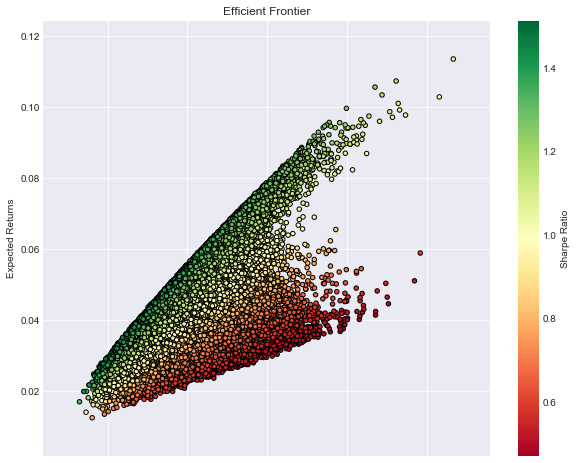

In [19]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
#plt.scatter(x=sharpe_port['Volatility'], y=sharpe_port['Returns'],c='red', marker='D',s=200)
#plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'],c='blue', marker='D',s=200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show() 

NameError: name 'initial_volatility' is not defined

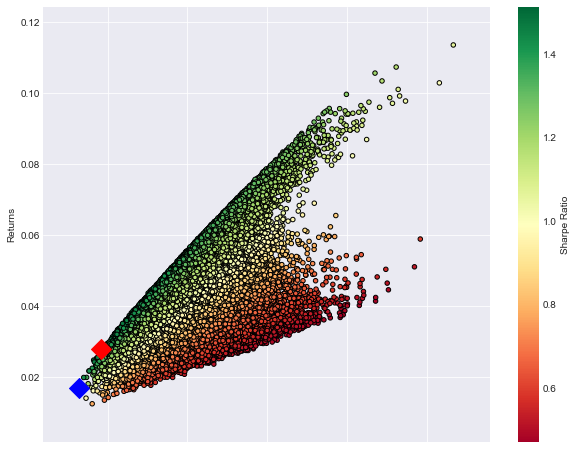

In [21]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_port['Volatility'], y=sharpe_port['Returns'],c='red', marker='D',s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'],c='blue', marker='D',s=200)
plt.scatter(x=initial_volatility, y=initial_returns,c='black', marker='D',s=200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [22]:
print(min_variance_port.T)
print(sharpe_port.T)

                 42027
Returns       0.017064
Volatility    0.012964
Sharpe Ratio  1.316249
IEI Weight    0.028143
IJT Weight    0.120179
TLT Weight    0.035800
SHV Weight    0.331999
MBB Weight    0.483766
IEF Weight    0.000114
                 23934
Returns       0.027901
Volatility    0.018432
Sharpe Ratio  1.513716
IEI Weight    0.010053
IJT Weight    0.075674
TLT Weight    0.107844
SHV Weight    0.393796
MBB Weight    0.404407
IEF Weight    0.008226
